In [1]:
import pandas as pd
import matplotlib.pyplot as plt

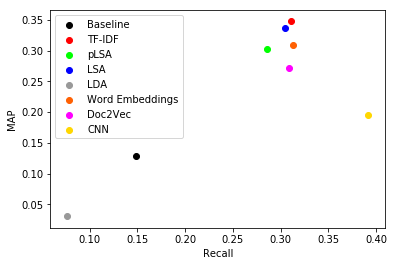

In [2]:
plt.scatter(0.1485332330673328,0.12798390390248596,label="Baseline",c="#000000") # baseline
plt.scatter(0.3113070393471838,0.3493109943879079,label="TF-IDF",c="#ff0000")
plt.scatter(0.28560709093467146,0.30295680794789775,label="pLSA",c="#00ff00")
plt.scatter(0.304459972799324,0.336378335041751,label="LSA",c="#0000ff")
plt.scatter(0.0765370726445622,0.0312170366747584,label="LDA",c="#999999")
plt.scatter(0.313136050274351, 0.309721989594664, label = "Word Embeddings", c="#FF6103")
plt.scatter(0.308962153543122, 0.271315961079363, label = "Doc2Vec", c="#FF00FF")
plt.scatter(0.391361440697838, 0.1947110356281217, label = "CNN", c = "#FFD700")

plt.xlabel("Recall")
plt.ylabel("MAP")
plt.legend()
plt.show()

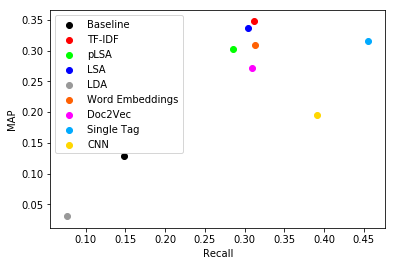

In [3]:
plt.scatter(0.1485332330673328,0.12798390390248596,label="Baseline",c="#000000") # baseline
plt.scatter(0.3113070393471838,0.3493109943879079,label="TF-IDF",c="#ff0000")
plt.scatter(0.28560709093467146,0.30295680794789775,label="pLSA",c="#00ff00")
plt.scatter(0.304459972799324,0.336378335041751,label="LSA",c="#0000ff")
plt.scatter(0.0765370726445622,0.0312170366747584,label="LDA",c="#999999")
plt.scatter(0.313136050274351, 0.309721989594664, label = "Word Embeddings", c="#FF6103")
plt.scatter(0.308962153543122, 0.271315961079363, label = "Doc2Vec", c="#FF00FF")
plt.scatter(0.45541340815616205,0.31595470648956375,label="Single Tag",c="#00aaff")
plt.scatter(0.391361440697838, 0.1947110356281217, label = "CNN", c = "#FFD700")

plt.xlabel("Recall")
plt.ylabel("MAP")
plt.legend()
plt.show()

In [22]:
lens = [1, 0, 0, 241, 11, 0, 3, 323, 2, 0, 1, 15, 0, 11, 6, 19, 0, 1, 1, 22, 1, 8, 2, 0, 107, 32, 2, 3, 0, 1, 61, 9, 2, 7, 52, 212, 0, 54, 6, 49, 764, 59, 9, 19, 8, 44, 102, 9, 2, 1, 80, 153, 35, 8, 105, 0, 0, 103, 18, 0, 0, 0, 0, 1, 0, 4, 0, 2, 0, 2, 2, 43, 2, 47, 85, 10, 195, 320, 24, 18, 1, 7, 4, 121, 0, 113, 15, 110, 1, 2, 0, 4, 1, 1, 20, 12, 0, 19, 29, 1, 1, 0, 47, 16, 6, 2, 2, 1, 0, 1, 124, 7, 10, 0, 1, 21, 5, 1, 74, 44, 0, 5, 2, 1, 0, 82, 207, 17, 1, 33, 1, 0, 0, 0, 0, 19, 36, 111, 4, 1, 23, 0, 0, 119, 1, 36]

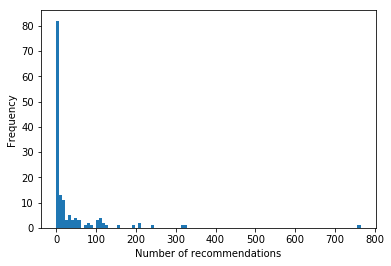

In [54]:
len_keywords = pd.DataFrame(lens)
len_keywords.plot(kind="hist",bins=100)
plt.legend().remove()
plt.xlabel("Number of recommendations")
plt.show()

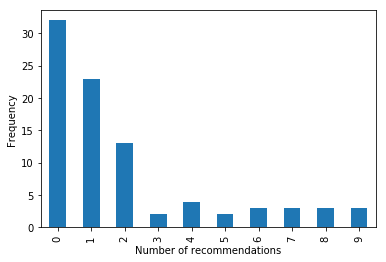

In [53]:
hist = len_keywords
hist["count"] = 0
hist = len_keywords.groupby(0).count().reset_index()
hist.columns = ["len","count"]
hist[hist["len"]<10]["count"].plot(kind="bar")
plt.xlabel("Number of recommendations")
plt.ylabel("Frequency")
plt.show()

In [55]:
print(len_keywords.median())
print(len_keywords.mean())
print(len_keywords.max())

0    4.0
dtype: float64
0    34.671233
dtype: float64
0    764
dtype: int64


# NN epoch graph

In [34]:
import os
import sys
import torch
import matplotlib.pyplot as plt

In [35]:
def plot_losses(fp):
    model_state = torch.load(fp)
    ymax = max((max(model_state["losses"][0]),max(model_state["losses"][1])))
    plt.plot(model_state["losses"][0])
    plt.plot(model_state["losses"][1])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend(["train","eval"],loc=3)
    plt.ylim(ymin=0,ymax=ymax+0.5)
    plt.savefig("plot_losses.pdf", bbox_inches="tight")
    plt.show()

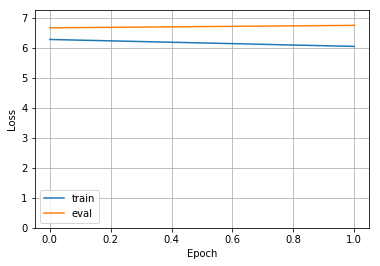

In [36]:
MODEL_NAME = "CNN-CPU-test"
EPOCH = None

file = "model-save-state" + (".e"+EPOCH if EPOCH is not None else "")
filepath = os.path.join(
    os.getcwd(),
    "..",
    "data",
    "processed",
    "nn",
    MODEL_NAME,
    file
)

plot_losses(filepath)